In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import IPython
from functools import cached_property

from qualtran.bloqs.data_loading import QROM, SelectSwapQROM
from qualtran.drawing import show_call_graph, show_counts_sigma, show_bloq, show_bloqs, draw_musical_score, get_musical_score_data

from qualtran.bloqs.state_preparation import StatePreparationAliasSampling

In [5]:
StatePreparationAliasSampling.from_lcu_probs?

Signature:
StatePreparationAliasSampling.from_lcu_probs(
    lcu_probabilities: Sequence[float],
    *,
    probability_epsilon: float = 1e-05,
) -> 'StatePreparationAliasSampling'
Docstring:
Factory to construct the state preparation gate for a given set of LCU coefficients.

Args:
    lcu_probabilities: The LCU coefficients.
    probability_epsilon: The desired accuracy to represent each probability
        (which sets mu size and keep/alt integers).
        See `qualtran.linalg.lcu_util.preprocess_lcu_coefficients_for_reversible_sampling`
        for more information.
File:      ~/git_repositories/forks/Qualtran/qualtran/bloqs/state_preparation/state_preparation_alias_sampling.py
Type:      method

In [36]:
nbits = sympy.Symbol('n')
dim = sympy.Symbol('N')

#epsilon = 1e-3
epsilon = sympy.Symbol('ε')

#lcu_probabilities = sympy.symbols(' '.join([f'p{i}' for i in range(2**nbits)]))

# bloq = StatePreparationAliasSampling.from_lcu_probs(lcu_probabilities=lcu_probabilities, probability_epsilon=epsilon)
bloq = StatePreparationAliasSampling.from_n_coeff(n_coeff=2**nbits, sum_of_lcu_coeffs = 1, probability_epsilon=epsilon)

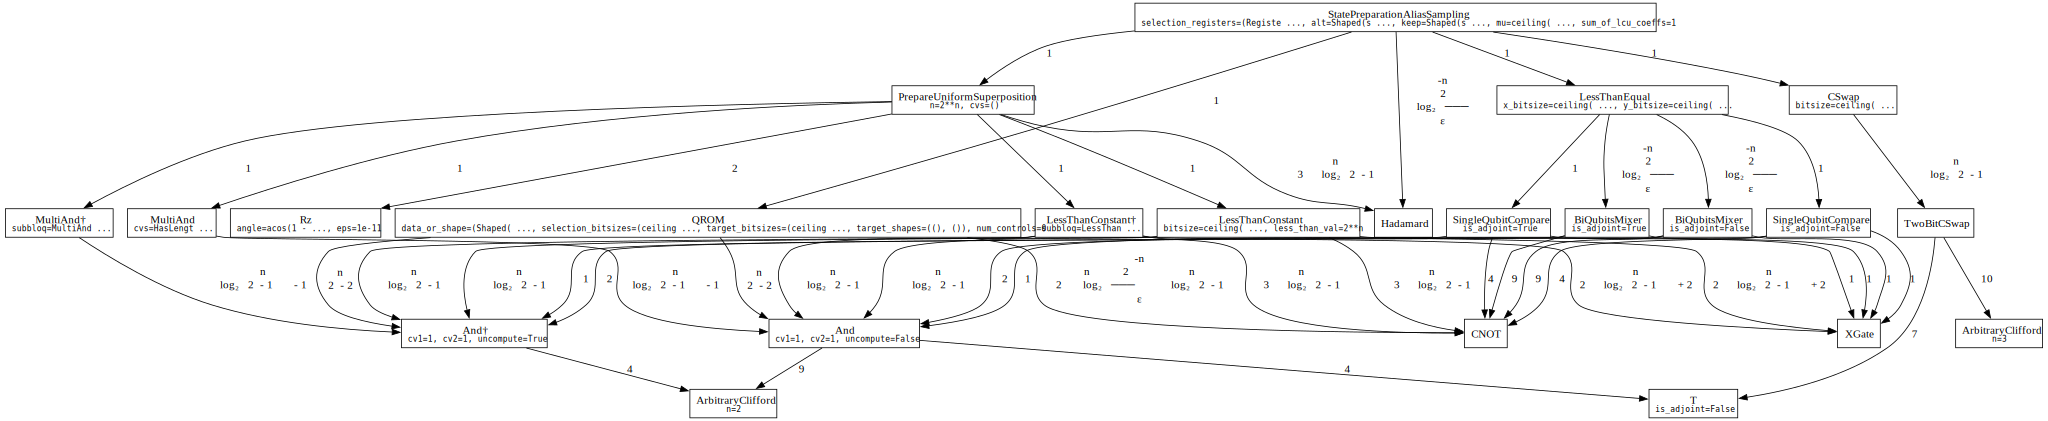

#### Counts totals:
 - `ArbitraryClifford(n=2)`: $\displaystyle 13 \cdot 2^{n} + 26 \left\lceil{\operatorname{log}_{2}{\left(\frac{2^{- n}}{ε} \right)}}\right\rceil + 39 \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil - 26$
 - `ArbitraryClifford(n=3)`: $\displaystyle 10 \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil$
 - `CNOT`: $\displaystyle 2^{n} \left\lceil{\operatorname{log}_{2}{\left(\frac{2^{- n}}{ε} \right)}}\right\rceil \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil + 18 \left\lceil{\operatorname{log}_{2}{\left(\frac{2^{- n}}{ε} \right)}}\right\rceil + 6 \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil + 8$
 - `H`: $\displaystyle \left\lceil{\operatorname{log}_{2}{\left(\frac{2^{- n}}{ε} \right)}}\right\rceil + 3 \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil$
 - `Rz(acos(1 - 2**floor(n)/2**n)/piπ)`: 2
 - `T`: $\displaystyle 4 \cdot 2^{n} + 8 \left\lceil{\operatorname{log}_{2}{\left(\frac{2^{- n}}{ε} \right)}}\right\rceil + 19 \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil - 8$
 - `XGate`: $\displaystyle 2 \left\lceil{\operatorname{log}_{2}{\left(\frac{2^{- n}}{ε} \right)}}\right\rceil + 4 \left\lceil{\operatorname{log}_{2}{\left(2^{n} - 1 \right)}}\right\rceil + 6$

In [37]:
cgraph, sigma = bloq.call_graph()
show_call_graph(cgraph)
show_counts_sigma(sigma)